In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
organics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6025 - Predictive Analytics/Classification Project/organics.csv')

organics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
organics.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


### Change Variable type of TargetBuy to Category

In [ ]:
organics['TargetBuy'] = organics['TargetBuy'].astype('category')

## Check for null values

In [ ]:
organics.isna().sum()/organics.shape[0]

ID                 0.000000
DemAffl            0.048823
DemAge             0.067858
DemCluster         0.030329
DemClusterGroup    0.030329
DemGender          0.113036
DemReg             0.020924
DemTVReg           0.020924
PromClass          0.000000
PromSpend          0.000000
PromTime           0.012645
TargetBuy          0.000000
TargetAmt          0.000000
dtype: float64

## We will need to impute the missing values


In [ ]:
# Fill null genders with 'U' for unknown
organics['DemGender'].fillna('U', inplace=True)

# Fill null affluence score with mean
organics['DemAffl'].fillna(organics['DemAffl'].mean(), inplace=True)

# Fill null age with mean
organics['DemAge'].fillna(organics['DemAge'].mean(), inplace=True)

# Fill null Neighborhood Type with 'Unknown'
organics['DemCluster'].fillna('Unknown', inplace=True)

# Fill null Neighborhood Group with 'Unknown'
organics['DemClusterGroup'].fillna('Unknown', inplace=True)

# Fill null region with 'Unknown'
organics['DemReg'].fillna('Unknown', inplace=True)

# Fill null TV region with 'Unknown'
organics['DemTVReg'].fillna('Unknown', inplace=True)

# Fill null time as loyalty customer with mean
organics['PromTime'].fillna(organics['PromTime'].mean(), inplace=True)

In [ ]:
organics.isna().sum()/organics.shape[0]

ID                 0.0
DemAffl            0.0
DemAge             0.0
DemCluster         0.0
DemClusterGroup    0.0
DemGender          0.0
DemReg             0.0
DemTVReg           0.0
PromClass          0.0
PromSpend          0.0
PromTime           0.0
TargetBuy          0.0
TargetAmt          0.0
dtype: float64

In [ ]:
organics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               22223 non-null  int64   
 1   DemAffl          22223 non-null  float64 
 2   DemAge           22223 non-null  float64 
 3   DemCluster       22223 non-null  object  
 4   DemClusterGroup  22223 non-null  object  
 5   DemGender        22223 non-null  object  
 6   DemReg           22223 non-null  object  
 7   DemTVReg         22223 non-null  object  
 8   PromClass        22223 non-null  object  
 9   PromSpend        22223 non-null  float64 
 10  PromTime         22223 non-null  float64 
 11  TargetBuy        22223 non-null  category
 12  TargetAmt        22223 non-null  int64   
dtypes: category(1), float64(4), int64(2), object(6)
memory usage: 2.1+ MB


# Exploratory Data Analysis

## Is there a relationship between age and purchasing organic products?

In [ ]:
import seaborn as sns
%matplotlib inline


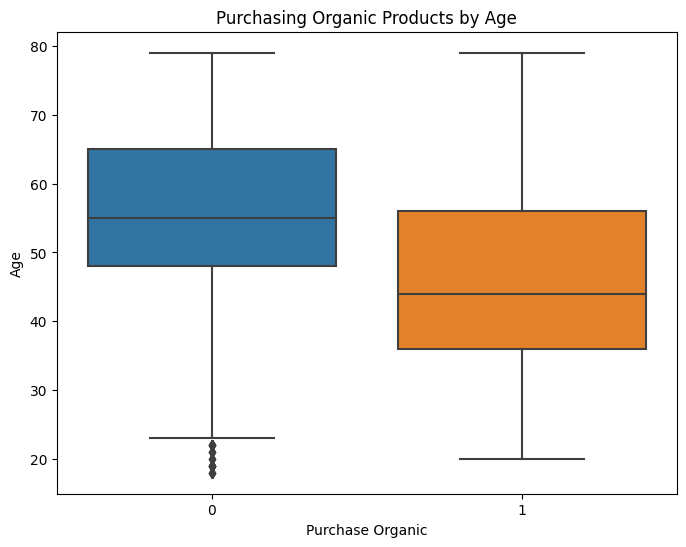

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(organics, x='TargetBuy', y='DemAge')
plt.title('Purchasing Organic Products by Age')
plt.xlabel('Purchase Organic')
plt.ylabel('Age')
plt.show()

## What about affluence score?

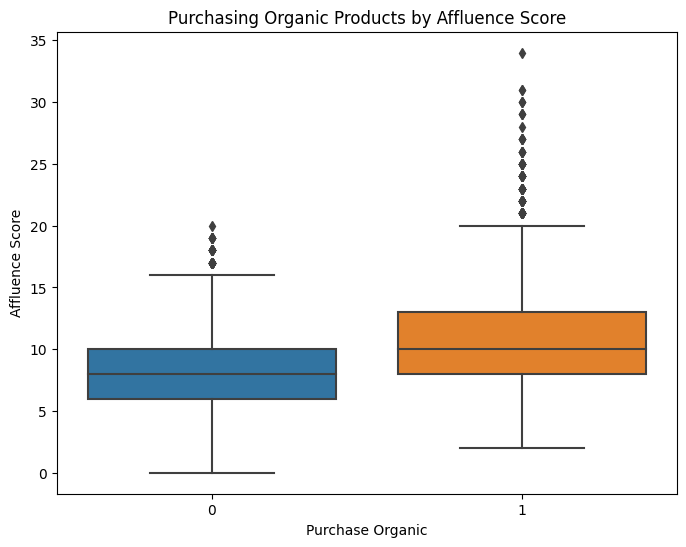

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(organics, x='TargetBuy', y='DemAffl')
plt.title('Purchasing Organic Products by Affluence Score')
plt.xlabel('Purchase Organic')
plt.ylabel('Affluence Score')
plt.show()

## Longevity of Loyalty Member

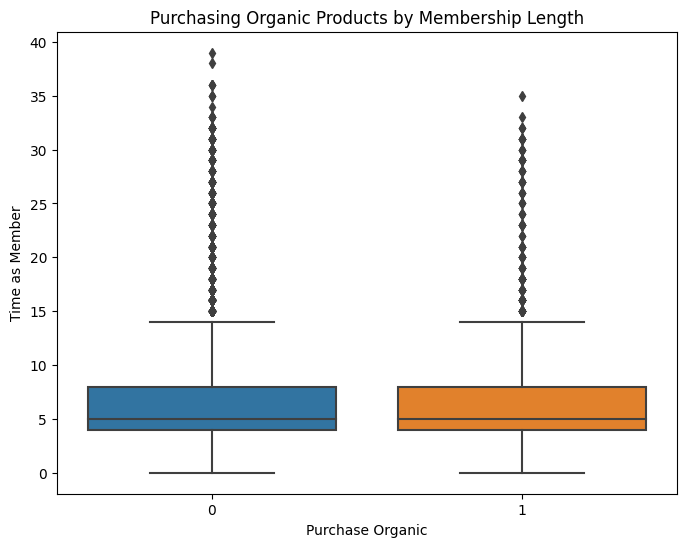

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(organics, x='TargetBuy', y='PromTime')
plt.title('Purchasing Organic Products by Membership Length')
plt.xlabel('Purchase Organic')
plt.ylabel('Time as Member')
plt.show()

## Do customers that purchase organic products spend more on average than customers who do not purhcase organic products?

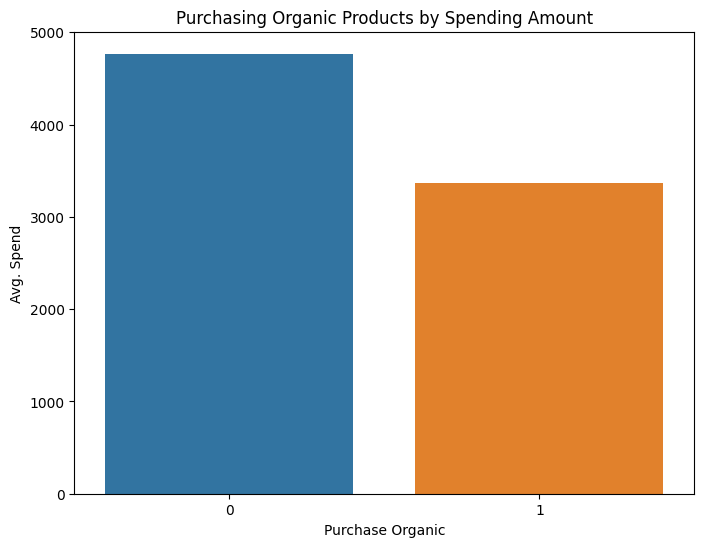

In [ ]:
mean_purchase = organics.groupby('TargetBuy')['PromSpend'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(mean_purchase, x='TargetBuy', y='PromSpend')
plt.title('Purchasing Organic Products by Spending Amount')
plt.xlabel('Purchase Organic')
plt.ylabel('Avg. Spend')
plt.show()

## Does a customer's gender impact whether or not he/she purchases organic?

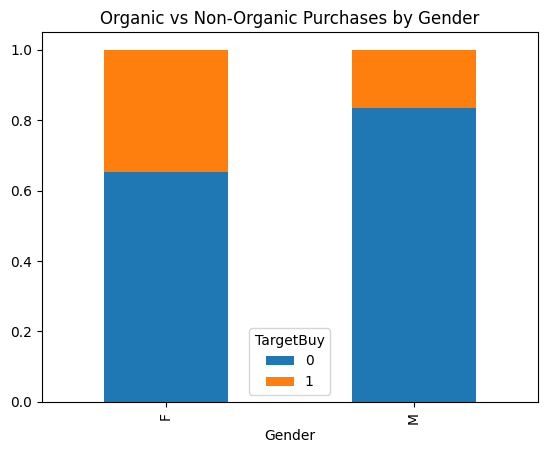

In [ ]:
gender = organics.groupby('DemGender')['TargetBuy'].value_counts(normalize=True).unstack()
gender.drop('U', inplace=True)
gender.plot(kind='bar', stacked=True)
plt.title('Organic vs Non-Organic Purchases by Gender')
plt.xlabel('Gender')
plt.show()

## Organic Purchasing by Loyalty Status

Which level has the highest percentage of organic purchases?

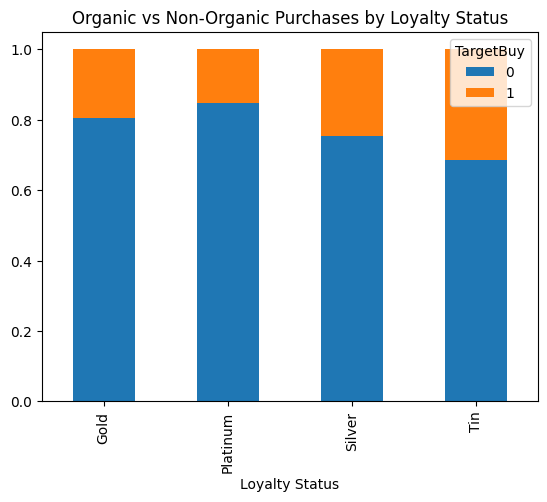

In [ ]:
loyalty = organics.groupby('PromClass')['TargetBuy'].value_counts(normalize=True).unstack()
loyalty.plot(kind='bar', stacked=True)
plt.title('Organic vs Non-Organic Purchases by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.show()

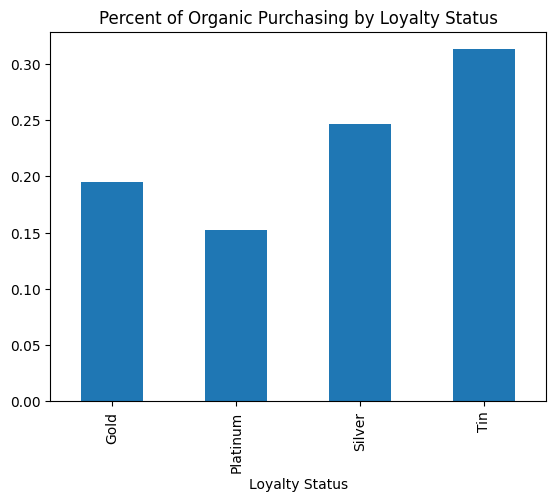

In [ ]:
loyalty[1].plot(kind='bar')
plt.title('Percent of Organic Purchasing by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.show()

## Organic Purchasing by Region

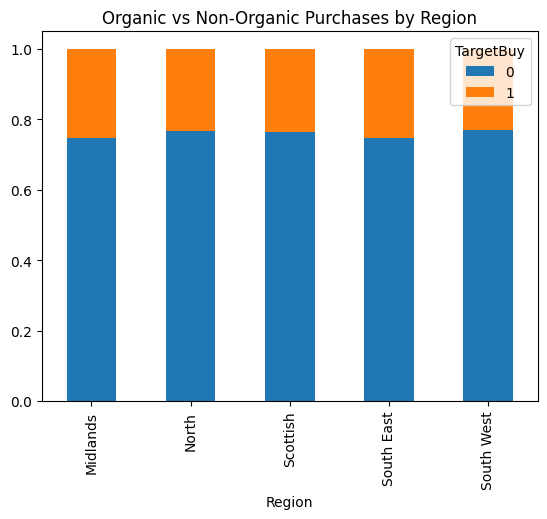

In [ ]:
region = organics.groupby('DemReg')['TargetBuy'].value_counts(normalize=True).unstack()
region.drop('Unknown', inplace = True)
region.plot(kind='bar', stacked=True)
plt.title('Organic vs Non-Organic Purchases by Region')
plt.xlabel('Region')
plt.show()

## Lets break things down further and look into how much different groups of organic customers spend on average to try and identify our big spenders

In [ ]:
organic_purchases = organics[organics['TargetBuy']==1]
organic_purchases = organic_purchases.reset_index()
organic_purchases['Average_Amt'] = organic_purchases['TargetAmt'].mean()
organic_purchases.head()

,index,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt,Average_Amt
0,2,868,5.0,70.000000,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1,1.189827
1,3,1120,10.0,65.000000,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1,1.189827
2,9,5886,14.0,43.000000,49.0,F,F,Unknown,Unknown,Gold,6000.00,1.0,1,1,1.189827
3,11,9814,5.0,53.797152,24.0,C,M,South East,London,Silver,5000.00,1.0,1,1,1.189827
4,14,10812,16.0,37.000000,18.0,C,F,South East,London,Tin,0.01,4.0,1,2,1.189827


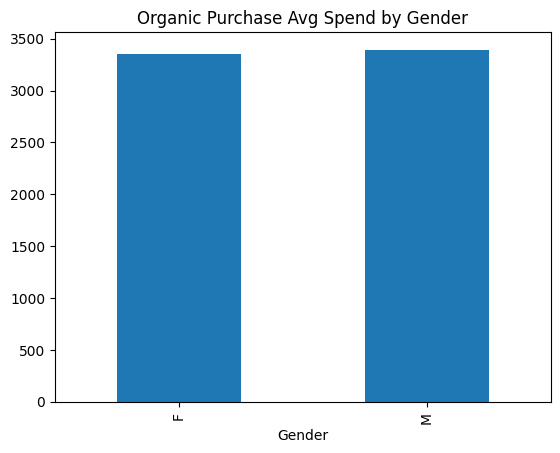

In [ ]:
o_gender = organic_purchases.groupby('DemGender')['PromSpend'].mean()
o_gender.drop('U', inplace=True)

o_gender.plot(kind='bar', stacked=True)
plt.title('Organic Purchase Avg Spend by Gender')
plt.xlabel('Gender')
plt.show()

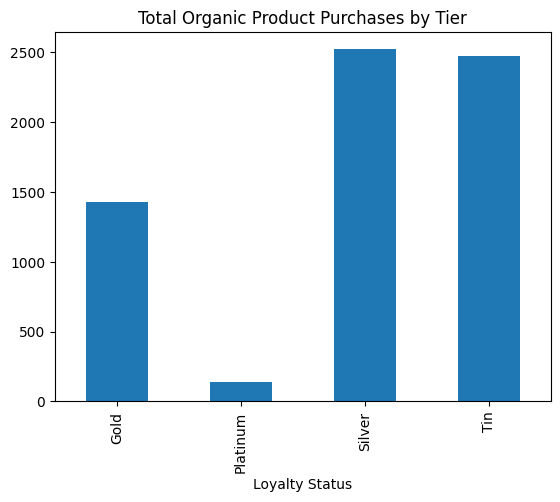

In [ ]:
num_organic = organic_purchases.groupby('PromClass')['TargetAmt'].sum()
num_organic.plot(kind='bar', stacked=True)
plt.title('Total Organic Product Purchases by Tier')
plt.xlabel('Loyalty Status')
plt.show()

# Start with Logistic Model

Not including variables 'ID', 'DemCluster', 'DemTVReg', 'TargetAmt'

In [ ]:
# split the data into training and testing sets
X = organics.drop(['TargetBuy', 'TargetAmt'], axis=1)
#Full model minus variables causing singularities in the model
X=organics[['DemAffl', 'DemAge', 'DemClusterGroup', 'DemGender','DemReg','PromClass', 'PromSpend', 'PromTime']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['DemClusterGroup', 'DemGender','DemReg','PromClass',], drop_first=True)

y = organics['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DemAffl                  15556 non-null  float64
 1   DemAge                   15556 non-null  float64
 2   PromSpend                15556 non-null  float64
 3   PromTime                 15556 non-null  float64
 4   DemClusterGroup_B        15556 non-null  uint8  
 5   DemClusterGroup_C        15556 non-null  uint8  
 6   DemClusterGroup_D        15556 non-null  uint8  
 7   DemClusterGroup_E        15556 non-null  uint8  
 8   DemClusterGroup_F        15556 non-null  uint8  
 9   DemClusterGroup_U        15556 non-null  uint8  
 10  DemClusterGroup_Unknown  15556 non-null  uint8  
 11  DemGender_M              15556 non-null  uint8  
 12  DemGender_U              15556 non-null  uint8  
 13  DemReg_North             15556 non-null  uint8  
 14  DemReg_Scottish    

### Fit Full Logistic Regression Model

In [ ]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y=y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())


Optimization terminated successfully.
         Current function value: 0.436999
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                15556
Model:                          Logit   Df Residuals:                    15534
Method:                           MLE   Df Model:                           21
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.2193
Time:                        15:13:25   Log-Likelihood:                -6798.0
converged:                       True   LL-Null:                       -8707.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1449      0.165     -0.880      0.379      -0.468   

### Evaluate Full Model

In [ ]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   DemAffl                  15556 non-null  float64 
 1   DemAge                   15556 non-null  float64 
 2   PromSpend                15556 non-null  float64 
 3   PromTime                 15556 non-null  float64 
 4   DemClusterGroup_B        15556 non-null  uint8   
 5   DemClusterGroup_C        15556 non-null  uint8   
 6   DemClusterGroup_D        15556 non-null  uint8   
 7   DemClusterGroup_E        15556 non-null  uint8   
 8   DemClusterGroup_F        15556 non-null  uint8   
 9   DemClusterGroup_U        15556 non-null  uint8   
 10  DemClusterGroup_Unknown  15556 non-null  uint8   
 11  DemGender_M              15556 non-null  uint8   
 12  DemGender_U              15556 non-null  uint8   
 13  DemReg_North             15556 non-null  uint8   
 14  Dem

### Generate Confusion Matricies

In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[11059  2355]
 [  644  1498]]
[[4748  963]
 [ 267  689]]


### Calculate ROC Curve

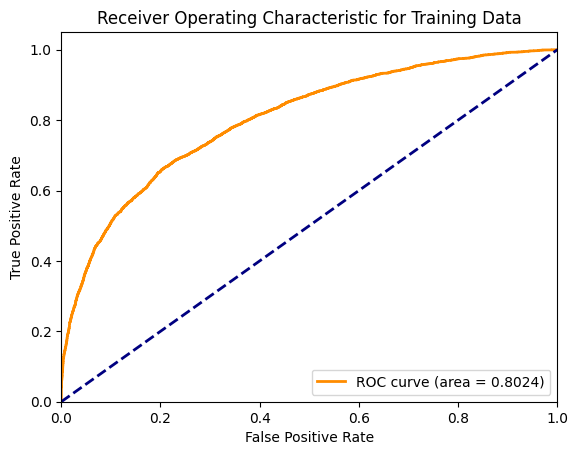

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

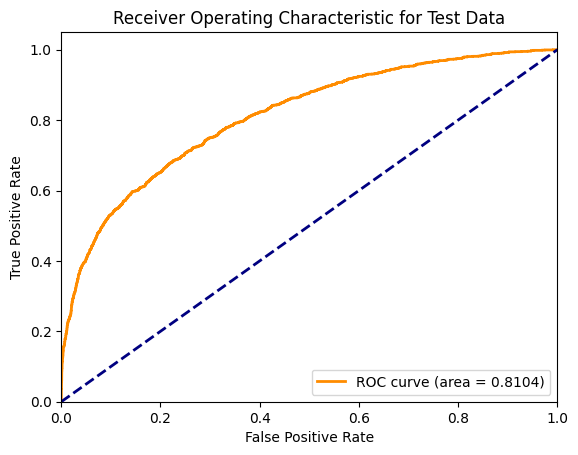

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8072
Precision (Train): 0.6993
Recall (Train)  : 0.3888

Accuracy (Test) : 0.8155
Precision (Test): 0.7207
Recall (Test)  : 0.4171



## Run a Stepwise Selection to only include significant variables

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


### Run Stepwise selection

In [ ]:
# split the data into training and testing sets
X1 = organics.drop(['TargetBuy', 'TargetAmt'], axis=1)
#Full model minus variables causing singularities in the model
X1 =organics[['DemAffl', 'DemAge', 'DemClusterGroup', 'DemGender','DemReg','PromClass', 'PromSpend', 'PromTime']]
#Create dummy variables for nominal inputs
X1 = pd.get_dummies(X1, columns=['DemClusterGroup', 'DemGender','DemReg','PromClass'], drop_first=True)

y1 = organics['TargetBuy']

In [ ]:
selected_features  = stepwise_selection(X1, y1)
print('resulting features:')
print(selected_features)

Add  DemAge with p-value 0.0000
Add  DemAffl with p-value 0.0000
Add  DemGender_U with p-value 0.0000
Add  DemGender_M with p-value 0.0000
Add  DemReg_North with p-value 0.0224
resulting features:
['DemAge', 'DemAffl', 'DemGender_U', 'DemGender_M', 'DemReg_North']


In [ ]:
X1 = X1[['DemAge', 'DemAffl', 'DemGender_U', 'DemGender_M', 'DemReg_North']]

#Split for stepwise
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_train1.info()
y_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DemAge        15556 non-null  float64
 1   DemAffl       15556 non-null  float64
 2   DemGender_U   15556 non-null  uint8  
 3   DemGender_M   15556 non-null  uint8  
 4   DemReg_North  15556 non-null  uint8  
dtypes: float64(2), uint8(3)
memory usage: 410.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 15556 entries, 5426 to 15795
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
15556 non-null  category
dtypes: category(1)
memory usage: 136.8 KB


## Take a look at Stepwise summary

In [ ]:
#Fit full logistic regression model to examine the significance of the terms
X1 = X_train1
X1 = sm.add_constant(X1)
y1 =y_train1

logit_step = sm.Logit(y1, X1).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.437340
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                15556
Model:                          Logit   Df Residuals:                    15550
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.2187
Time:                        15:14:28   Log-Likelihood:                -6803.3
converged:                       True   LL-Null:                       -8707.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1608      0.112     -1.442      0.149      -0.379       0.058
DemAge          -0.0535

After viewing the stepwise output, we can see that 'DemReg_North' is not significant. Will need to remove and run again.

In [ ]:
X1 = X1[['DemAge', 'DemAffl', 'DemGender_U', 'DemGender_M']]

#Split for stepwise
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_train1.info()
y_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10889 entries, 9106 to 13112
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DemAge       10889 non-null  float64
 1   DemAffl      10889 non-null  float64
 2   DemGender_U  10889 non-null  uint8  
 3   DemGender_M  10889 non-null  uint8  
dtypes: float64(2), uint8(2)
memory usage: 276.5 KB
<class 'pandas.core.series.Series'>
Int64Index: 10889 entries, 9106 to 13112
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
10889 non-null  category
dtypes: category(1)
memory usage: 95.8 KB


In [ ]:
#Fit full logistic regression model to examine the significance of the terms
X1 = X_train1
X1 = sm.add_constant(X1)
y1 =y_train1

logit_step = sm.Logit(y1, X1).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.436358
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                10889
Model:                          Logit   Df Residuals:                    10884
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.2178
Time:                        15:15:16   Log-Likelihood:                -4751.5
converged:                       True   LL-Null:                       -6074.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0780      0.133     -0.585      0.558      -0.339       0.183
DemAge         -0.0543    

## Evaluate Stepwise Model

In [ ]:
# Generate predicted values for training set
pprob = logit_step.predict(X1)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train1['p_success'] = psuccess
X_train1['p_prob'] = pprob
X_train1['y'] = y_train1

X_train1.info()


# Generate predicted values for test set

X_test1 = sm.add_constant(X_test1)

pprob_test = logit_step.predict(X_test1)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test1['p_success'] = psuccess_test
X_test1['p_prob'] = pprob_test

X_test1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10889 entries, 9106 to 13112
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   DemAge       10889 non-null  float64 
 1   DemAffl      10889 non-null  float64 
 2   DemGender_U  10889 non-null  uint8   
 3   DemGender_M  10889 non-null  uint8   
 4   p_success    10889 non-null  int64   
 5   p_prob       10889 non-null  float64 
 6   y            10889 non-null  category
dtypes: category(1), float64(3), int64(1), uint8(2)
memory usage: 457.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4667 entries, 10611 to 9662
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        4667 non-null   float64
 1   DemAge       4667 non-null   float64
 2   DemAffl      4667 non-null   float64
 3   DemGender_U  4667 non-null   uint8  
 4   DemGender_M  4667 non-null   uint8  
 5   p_success    4667 

## Stepwise Confusion Matrix

In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train1)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test1)
print(conf_matrix)

[[11045  2353]
 [  658  1500]]
[[4751  964]
 [ 264  688]]


## ROC for Training and Test

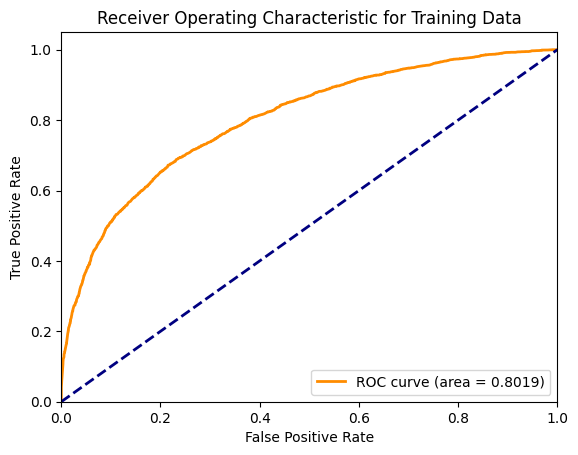

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train1.cat.codes, pprob)
roc_auc = roc_auc_score(y_train1.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

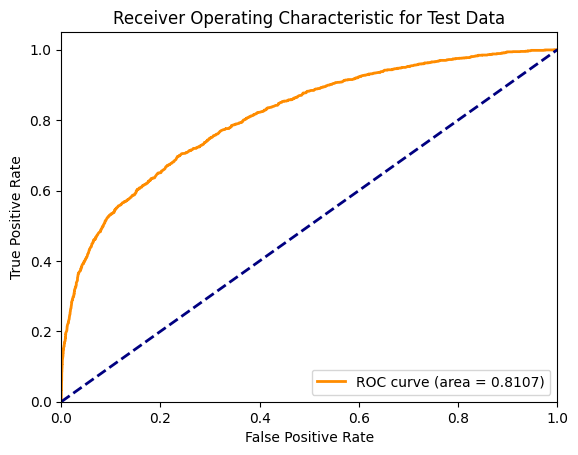

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test1.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test1.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train1, psuccess)
prec_train = precision_score(y_train1, psuccess)
rec_train = recall_score(y_train1, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test1, psuccess_test)
prec_test = precision_score(y_test1, psuccess_test)
rec_test = recall_score(y_test1, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8064
Precision (Train): 0.6951
Recall (Train)  : 0.3893

Accuracy (Test) : 0.8158
Precision (Test): 0.7227
Recall (Test)  : 0.4165



## Use Lasso L1 Technique for Feature Selection

In [ ]:
# split the data into training and testing sets
X2 = organics.drop(['TargetBuy', 'TargetAmt'], axis=1)
#Full model minus variables causing singularities in the model
X2 =organics[['DemAffl', 'DemAge', 'DemClusterGroup', 'DemGender','DemReg','PromClass', 'PromSpend', 'PromTime']]
#Create dummy variables for nominal inputs
X2 = pd.get_dummies(X2, columns=['DemClusterGroup', 'DemGender','DemReg','PromClass'], drop_first=True)

y2 = organics['TargetBuy']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

X_train2.info()
y_train2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DemAffl                  15556 non-null  float64
 1   DemAge                   15556 non-null  float64
 2   PromSpend                15556 non-null  float64
 3   PromTime                 15556 non-null  float64
 4   DemClusterGroup_B        15556 non-null  uint8  
 5   DemClusterGroup_C        15556 non-null  uint8  
 6   DemClusterGroup_D        15556 non-null  uint8  
 7   DemClusterGroup_E        15556 non-null  uint8  
 8   DemClusterGroup_F        15556 non-null  uint8  
 9   DemClusterGroup_U        15556 non-null  uint8  
 10  DemClusterGroup_Unknown  15556 non-null  uint8  
 11  DemGender_M              15556 non-null  uint8  
 12  DemGender_U              15556 non-null  uint8  
 13  DemReg_North             15556 non-null  uint8  
 14  DemReg_Scottish    

In [ ]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X_train2, y_train2)
lr_l1_01.fit(X_train2, y_train2)



LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X2.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients
print('--------L1, C = 0.1--------')
df_coefficients1 = rpt_model_variables(lr_l1_1)
print('--------L1, C = 0.01--------')
df_coefficients01 = rpt_model_variables(lr_l1_01)

--------L1, C = 0.1--------
                    feature  coefficient  abs_coefficient
12              DemGender_U      -1.6561           1.6561
11              DemGender_M      -0.9462           0.9462
0                   DemAffl       0.2445           0.2445
1                    DemAge      -0.0534           0.0534
19         PromClass_Silver      -0.0382           0.0382
13             DemReg_North      -0.0316           0.0316
4         DemClusterGroup_B      -0.0263           0.0263
5         DemClusterGroup_C       0.0177           0.0177
15        DemReg_South East      -0.0063           0.0063
3                  PromTime       0.0028           0.0028
14          DemReg_Scottish       0.0000           0.0000
18       PromClass_Platinum       0.0000           0.0000
17           DemReg_Unknown       0.0000           0.0000
16        DemReg_South West       0.0000           0.0000
10  DemClusterGroup_Unknown       0.0000           0.0000
9         DemClusterGroup_U       0.0000    

## Make Predictions on Training and Test

In [ ]:
# make predictions on the testing data

# L1 C=0.1
y_pred_train = lr_l1_1.predict(X_train2)
y_pred_test = lr_l1_1.predict(X_test2)
y_proba_train = lr_l1_1.predict_proba(X_train2)
y_proba_test = lr_l1_1.predict_proba(X_test2)

# L1 C=0.01
y_pred_train1 = lr_l1_01.predict(X_train2)
y_pred_test1 = lr_l1_01.predict(X_test2)
y_proba_train1 = lr_l1_01.predict_proba(X_train2)
y_proba_test1 = lr_l1_01.predict_proba(X_test2)



# Calculate Accuracy, Recall, Precision, and AUC for each model

### L1 C=0.1 Model

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y_train2, y_pred_train)
prec3_train = precision_score(y_train2, y_pred_train)
rec3_train = recall_score(y_train2, y_pred_train)
auc3_train = roc_auc_score(y_train2, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y_test2, y_pred_test)
prec3_test = precision_score(y_test2, y_pred_test)
rec3_test = recall_score(y_test2, y_pred_test)
auc3_test = roc_auc_score(y_test2, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.8076
Precision: 0.7028
Recall.  : 0.3867
AUC      : 0.8020

 -- test set -- 
Accuracy : 0.8152
Precision: 0.7215
Recall.  : 0.4140
AUC      : 0.8105


### L1 C=0.01

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y_train2, y_pred_train1)
prec3_train1 = precision_score(y_train2, y_pred_train1)
rec3_train1 = recall_score(y_train2, y_pred_train1)
auc3_train1 = roc_auc_score(y_train2, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y_test2, y_pred_test1)
prec3_test1 = precision_score(y_test2, y_pred_test1)
rec3_test1 = recall_score(y_test2, y_pred_test1)
auc3_test1 = roc_auc_score(y_test2, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.8058
Precision: 0.7144
Recall.  : 0.3597
AUC      : 0.7979

 -- test set -- 
Accuracy : 0.8178
Precision: 0.7509
Recall.  : 0.3959
AUC      : 0.8057


### L2

In [ ]:
# split the data into training and testing sets
X3 = organics.drop(['TargetBuy', 'TargetAmt'], axis=1)
#Full model minus variables causing singularities in the model
X3 =organics[['DemAffl', 'DemAge', 'DemClusterGroup', 'DemGender','DemReg','PromClass', 'PromSpend', 'PromTime']]
#Create dummy variables for nominal inputs
X3 = pd.get_dummies(X3, columns=['DemClusterGroup', 'DemGender','DemReg','PromClass'], drop_first=True)

y3 = organics['TargetBuy']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

X_train3.info()
y_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DemAffl                  15556 non-null  float64
 1   DemAge                   15556 non-null  float64
 2   PromSpend                15556 non-null  float64
 3   PromTime                 15556 non-null  float64
 4   DemClusterGroup_B        15556 non-null  uint8  
 5   DemClusterGroup_C        15556 non-null  uint8  
 6   DemClusterGroup_D        15556 non-null  uint8  
 7   DemClusterGroup_E        15556 non-null  uint8  
 8   DemClusterGroup_F        15556 non-null  uint8  
 9   DemClusterGroup_U        15556 non-null  uint8  
 10  DemClusterGroup_Unknown  15556 non-null  uint8  
 11  DemGender_M              15556 non-null  uint8  
 12  DemGender_U              15556 non-null  uint8  
 13  DemReg_North             15556 non-null  uint8  
 14  DemReg_Scottish    

In [ ]:
# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')


# fit the models to the training data
lr_l2.fit(X_train3, y_train3)

print('---------L2-----------')
df_coefficients2 = rpt_model_variables(lr_l2)

---------L2-----------
                    feature  coefficient  abs_coefficient
12              DemGender_U      -1.1956           1.1956
11              DemGender_M      -0.8007           0.8007
0                   DemAffl       0.2465           0.2465
19         PromClass_Silver      -0.1055           0.1055
20            PromClass_Tin      -0.0699           0.0699
13             DemReg_North      -0.0632           0.0632
4         DemClusterGroup_B      -0.0627           0.0627
1                    DemAge      -0.0534           0.0534
14          DemReg_Scottish      -0.0451           0.0451
15        DemReg_South East      -0.0435           0.0435
16        DemReg_South West       0.0380           0.0380
6         DemClusterGroup_D      -0.0362           0.0362
10  DemClusterGroup_Unknown       0.0327           0.0327
17           DemReg_Unknown      -0.0303           0.0303
7         DemClusterGroup_E      -0.0287           0.0287
5         DemClusterGroup_C       0.0198         

Make Predictions on Training and Test

In [ ]:
# L2
y_pred_train3 = lr_l2.predict(X_train3)
y_pred_test3 = lr_l2.predict(X_test3)
y_proba_train3 = lr_l2.predict_proba(X_train3)
y_proba_test3 = lr_l2.predict_proba(X_test3)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train3 = accuracy_score(y_train3, y_pred_train3)
prec3_train3 = precision_score(y_train3, y_pred_train3)
rec3_train3 = recall_score(y_train3, y_pred_train3)
auc3_train3 = roc_auc_score(y_train3, y_proba_train3[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train3))
print("Precision: {:.4f}".format(prec3_train3))
print("Recall.  : {:.4f}".format(rec3_train3))
print("AUC      : {:.4f}".format(auc3_train3))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test3 = accuracy_score(y_test3, y_pred_test3)
prec3_test3 = precision_score(y_test3, y_pred_test3)
rec3_test3 = recall_score(y_test3, y_pred_test3)
auc3_test3 = roc_auc_score(y_test3, y_proba_test3[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test3))
print("Precision: {:.4f}".format(prec3_test3))
print("Recall.  : {:.4f}".format(rec3_test3))
print("AUC      : {:.4f}".format(auc3_test3))

 -- train set -- 
Accuracy : 0.8068
Precision: 0.7127
Recall.  : 0.3683
AUC      : 0.7996

 -- test set -- 
Accuracy : 0.8163
Precision: 0.7354
Recall.  : 0.4038
AUC      : 0.8063


# Decision Tree using Grid Search for Optimal Parameters

Only using Gender and Member Tier as Categorical Variables

In [ ]:
# split the data into training and testing sets
X5 = organics.drop(['TargetBuy', 'TargetAmt'], axis=1)
#Full model minus variables causing singularities in the model
X5=organics[['DemAffl', 'DemAge', 'DemGender','PromClass', 'PromSpend', 'PromTime']]
#Create dummy variables for nominal inputs
X5 = pd.get_dummies(X5, columns=['DemGender', 'PromClass'], drop_first=True)

y5 = organics['TargetBuy']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state=42)

X_train5.info()
y_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             15556 non-null  float64
 1   DemAge              15556 non-null  float64
 2   PromSpend           15556 non-null  float64
 3   PromTime            15556 non-null  float64
 4   DemGender_M         15556 non-null  uint8  
 5   DemGender_U         15556 non-null  uint8  
 6   PromClass_Platinum  15556 non-null  uint8  
 7   PromClass_Silver    15556 non-null  uint8  
 8   PromClass_Tin       15556 non-null  uint8  
dtypes: float64(4), uint8(5)
memory usage: 683.6 KB
<class 'pandas.core.series.Series'>
Int64Index: 15556 entries, 5426 to 15795
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
15556 non-null  category
dtypes: category(1)
memory usage: 136.8 KB


In [ ]:
dt_tune = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train5, y_train5)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 100}
DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=100, random_state=42)


In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(min_samples_leaf=100, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X_train5, y_train5)

DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X5.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_proj3")

'decision_tree_proj3.pdf'

## Make Predictions on Tree

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train5)
y_pred_test = dt.predict(X_test5)

y_prob_train = dt.predict_proba(X_train5)
y_prob_test = dt.predict_proba(X_test5)


## Assess Model Statistics

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train5, y_pred_train)
prec_train = precision_score(y_train5, y_pred_train)
rec_train = recall_score(y_train5, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test5, y_pred_test)
prec_test = precision_score(y_test5, y_pred_test)
rec_test = recall_score(y_test5, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8156
Precision: 0.6868
Recall.  : 0.4695

 -- test set -- 
Accuracy : 0.8140
Precision: 0.6801
Recall.  : 0.4709


## Print Confusion Matrix

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train5)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test5)
print(conf_matrix)

[[10878  2044]
 [  825  1809]]
[[4649  874]
 [ 366  778]]


## ROC Curves for Training and Test

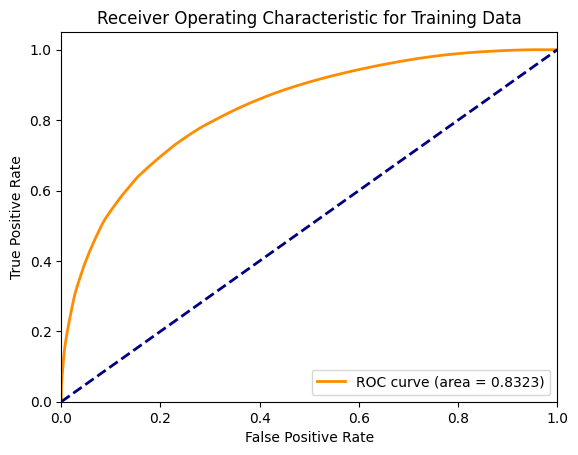

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train5.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train5.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

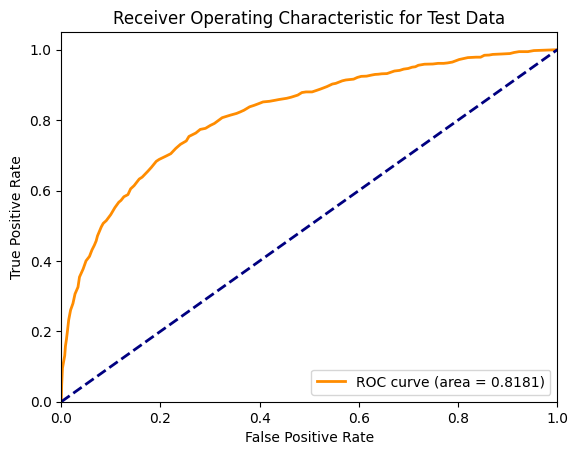

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test5.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test5.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

### Print Feature Importance

   importance             feature
1    0.488631              DemAge
0    0.324496             DemAffl
5    0.090398         DemGender_U
4    0.074781         DemGender_M
3    0.009980            PromTime
2    0.008292           PromSpend
7    0.003422    PromClass_Silver
6    0.000000  PromClass_Platinum
8    0.000000       PromClass_Tin


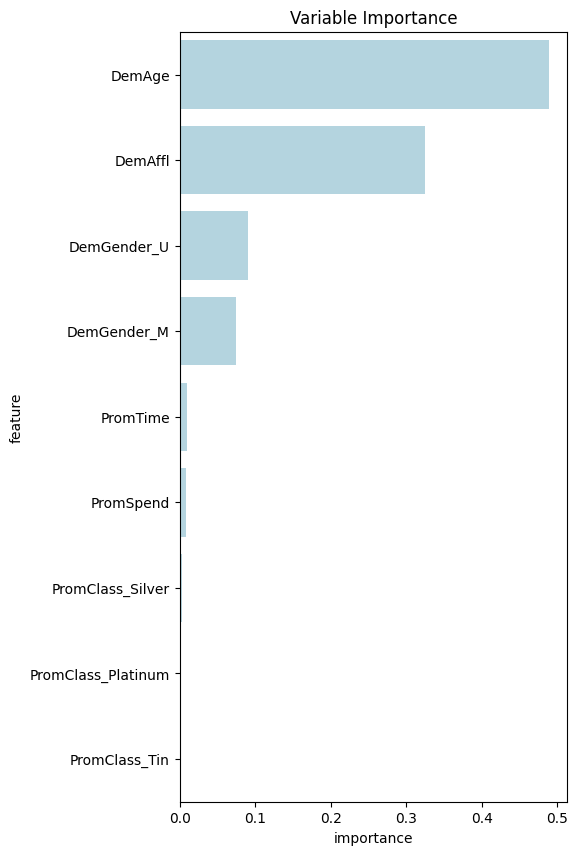

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X5.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

## Try 1 More Decision Tree, This time with max_depth = 10

In [ ]:
# create an instance of a decision tree classifier using default values

dt2 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=100)

# fit the model to the training data
dt2.fit(X_train5, y_train5)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt2, filled=True, rounded=True, feature_names=X5.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree2_proj3")

'decision_tree2_proj3.pdf'

## Display Tree Output

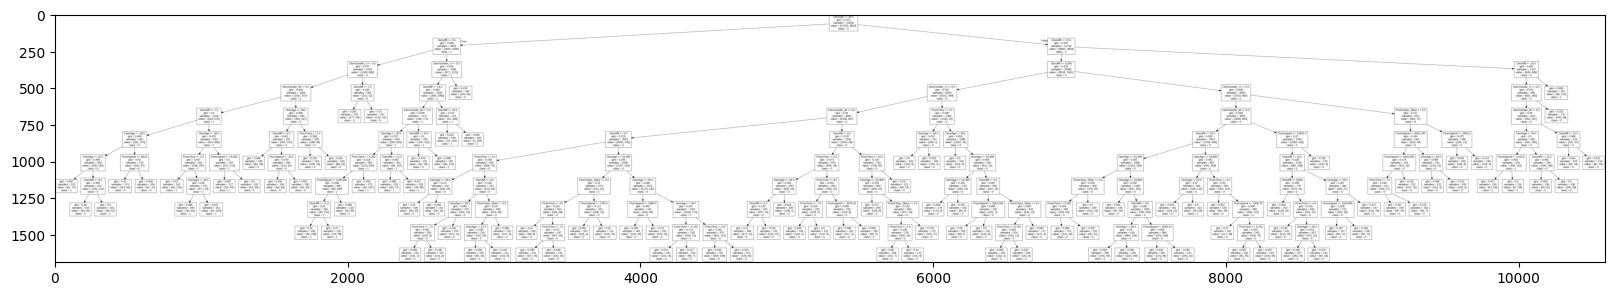

In [ ]:
export_graphviz(dt2,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train5.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

## Make Predictions with Tree 2

In [ ]:
# make predictions on the training and test data
y_pred_train2 = dt2.predict(X_train5)
y_pred_test2 = dt2.predict(X_test5)

y_prob_train2 = dt2.predict_proba(X_train5)
y_prob_test2 = dt2.predict_proba(X_test5)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train5, y_pred_train2)
prec_train = precision_score(y_train5, y_pred_train2)
rec_train = recall_score(y_train5, y_pred_train2)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test5, y_pred_test2)
prec_test = precision_score(y_test5, y_pred_test2)
rec_test = recall_score(y_test5, y_pred_test2)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8156
Precision: 0.6868
Recall.  : 0.4695

 -- test set -- 
Accuracy : 0.8140
Precision: 0.6801
Recall.  : 0.4709


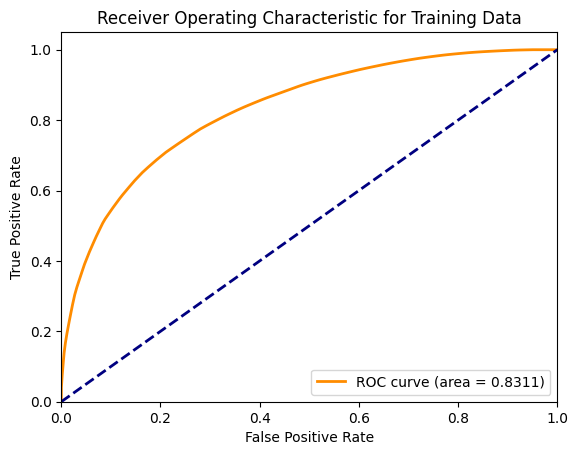

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train5.cat.codes, y_prob_train2[:,1])
roc_auc = roc_auc_score(y_train5.cat.codes, y_prob_train2[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

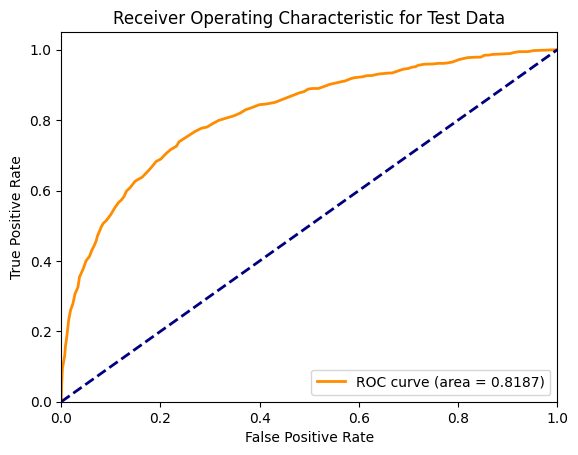

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test5.cat.codes, y_prob_test2[:,1])
roc_auc = roc_auc_score(y_test5.cat.codes, y_prob_test2[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

   importance             feature
1    0.490323              DemAge
0    0.325950             DemAffl
5    0.090803         DemGender_U
4    0.075116         DemGender_M
2    0.007483           PromSpend
3    0.006887            PromTime
7    0.003437    PromClass_Silver
6    0.000000  PromClass_Platinum
8    0.000000       PromClass_Tin


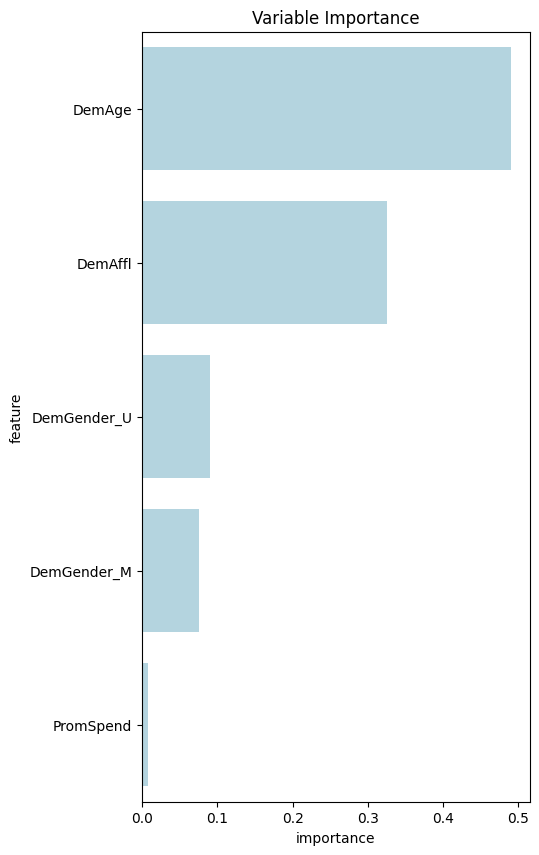

In [ ]:
#calculate feature importance
tree_imp = dt2.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X5.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)
top5 = df2.head()

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=top5,
            y=top5['feature'],
            x=top5['importance'], color="lightblue")

plt.show()

## Since our Accuracy, Precision, and Recall did not change, we will use the DT with 10 max depth as it is simpler.

# Score New Customers using Decision Tree Model

In [ ]:
new_customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6025 - Predictive Analytics/Classification Project/New_organics.csv')
new_customers.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,1,6,46,27,D,F,South East,London,Tin,0.01,8
1,2,10,39,12,B,M,Midlands,Ulster,Tin,0.01,5
2,3,7,75,12,B,M,Midlands,East,Silver,4000.00,7
3,4,7,72,12,B,F,Midlands,Ulster,Silver,1250.00,23
4,5,7,43,53,F,M,North,N West,Tin,0.01,5


In [ ]:
scored_customers = new_customers.copy()
scored_customers.drop(columns=['ID', 'DemCluster', 'DemClusterGroup', 'DemReg', 'DemTVReg'], axis=1, inplace=True)

In [ ]:
scored_customers['DemGender'].value_counts()

F    82
M    51
U    17
Name: DemGender, dtype: int64

In [ ]:
scored_customers = pd.get_dummies(scored_customers, columns=['DemGender', 'PromClass'], drop_first=True)
scored_customers.head()

,DemAffl,DemAge,PromSpend,PromTime,DemGender_M,DemGender_U,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,6,46,0.01,8,0,0,0,0,1
1,10,39,0.01,5,1,0,0,0,1
2,7,75,4000.00,7,1,0,0,1,0
3,7,72,1250.00,23,0,0,0,1,0
4,7,43,0.01,5,1,0,0,0,1


In [ ]:
# make predictions on the New Dataset
Scored_class = dt.predict(scored_customers)
Scored_probs = dt.predict_proba(scored_customers)

scored_customers['pred_organic'] = Scored_class
scored_customers['prod_prob_organic']=Scored_probs[:,1]
scored_customers['pred_prob_organic'] = Scored_probs[:,0]

print(scored_customers.head())

   DemAffl  DemAge  PromSpend  PromTime  DemGender_M  DemGender_U  \
0        6      46       0.01         8            0            0   
1       10      39       0.01         5            1            0   
2        7      75    4000.00         7            1            0   
3        7      72    1250.00        23            0            0   
4        7      43       0.01         5            1            0   

   PromClass_Platinum  PromClass_Silver  PromClass_Tin  pred_organic  \
0                   0                 0              1             0   
1                   0                 0              1             0   
2                   0                 1              0             0   
3                   0                 1              0             0   
4                   0                 0              1             0   

   prod_prob_organic  pred_prob_organic  
0           0.137931           0.862069  
1           0.386139           0.613861  
2           0.098837      

In [ ]:
scored_file = 'NewOrganicsScored.xlsx'
scored_customers.to_excel(scored_file)

In [ ]:
## Convert notebook to HTML
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Macon_Barker_Project3_Code.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Macon_Barker_Project3_Code.ipynb to html
[NbConvertApp] Writing 1848794 bytes to /content/drive/MyDrive/Colab Notebooks/Macon_Barker_Project3_Code.html
